In [64]:
from ladder_game import LadderGame
import matplotlib
import matplotlib.pyplot as plt
import platform
import sys

font_family = 'NanumGothic'  #linux
if platform.system() == 'Windows':  # Window
     font_family = 'Malgun Gothic'
elif platform.system() == 'Darwin': # Mac
    font_family = 'AppleGothic'
matplotlib.rc('font', family=font_family)

In [65]:
def do_game(num_verticals, num_steps, target):
    if target > num_verticals:
        raise IndexError

    num_vertical_slots = num_verticals * 5

    result = [0 for _ in range(num_verticals)]

    for g in range(1000):
        game = LadderGame(num_verticals, num_vertical_slots, num_steps)
        game.set_value(target, 'Star')
        for i in range(num_verticals):
            value = game.get_value_for_vertical(i + 1)
            if value == 'Star':
                result[i] = result[i] + 1
                break
    
    return result

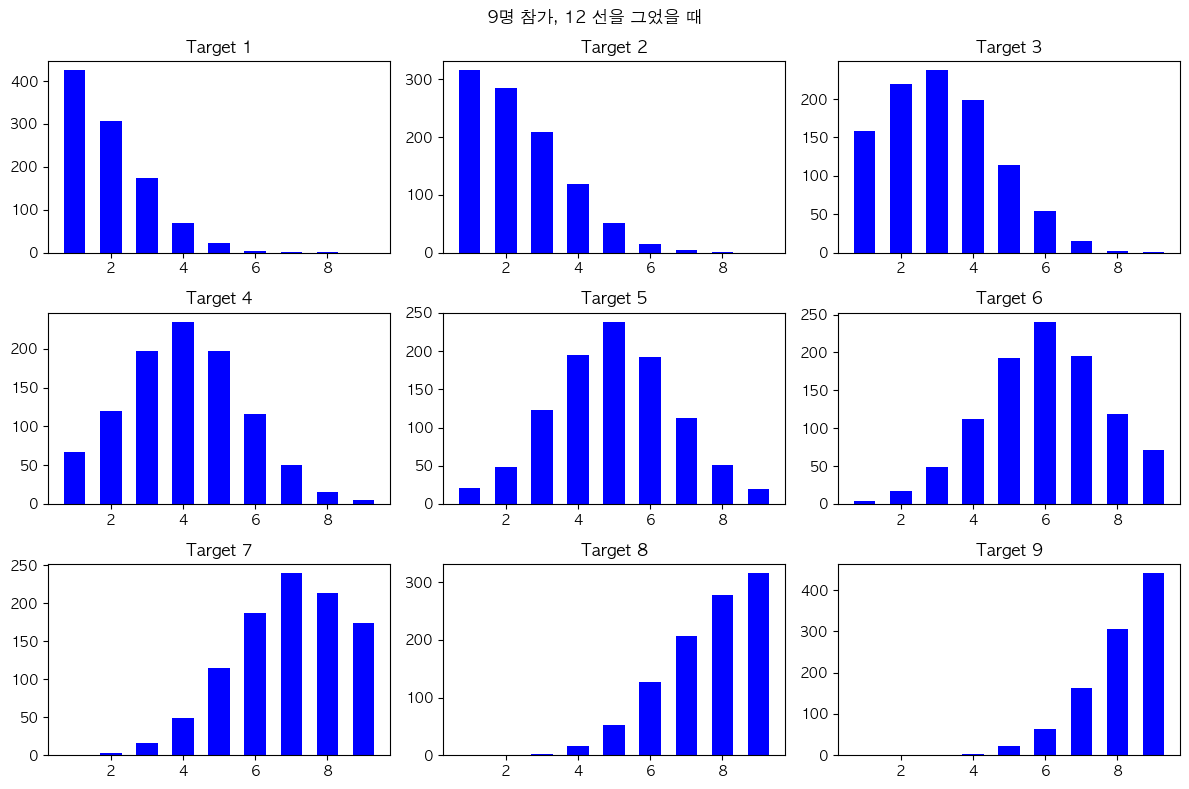

In [69]:
number_of_verticals = 9
num_steps = 12

number_of_iterations = 10

fig, axs = plt.subplots(3, 3, figsize=(12, 8))
fig.suptitle(f'{number_of_verticals}명 참가, {num_steps} 선을 그었을 때')
for index in range(number_of_verticals):
    target_position = index + 1
    ax = axs[int(index/3), index % 3]
    total_result = [0 for _ in range(number_of_verticals)]

    for _ in range(number_of_iterations):
        result = do_game(number_of_verticals, num_steps, target_position)
        for idx, val in enumerate(result):
            total_result[idx] = total_result[idx] + val

    average_result = [val / number_of_iterations for val in total_result]

    locations = [i + 1 for i in range(number_of_verticals)]
    ax.bar(locations, average_result, color ='blue', width = 0.6)
    ax.set_title(f"Target {target_position}")
fig.tight_layout()